**Exercise 9: Support Vector Machines**

*CPSC 381/581: Machine Learning*

*Yale University*

*Instructor: Alex Wong*

*Student: Hailey Robertson*


**Prerequisites**:

1. Enable Google Colaboratory as an app on your Google Drive account

2. Create a new Google Colab notebook, this will also create a "Colab Notebooks" directory under "MyDrive" i.e.
```
/content/drive/MyDrive/Colab Notebooks
```

3. Create the following directory structure in your Google Drive
```
/content/drive/MyDrive/Colab Notebooks/CPSC 381-581: Machine Learning/Exercises
```

4. Move the 09_exercise_support_vector_machines.ipynb into
```
/content/drive/MyDrive/Colab Notebooks/CPSC 381-581: Machine Learning/Exercises
```
so that its absolute path is
```
/content/drive/MyDrive/Colab Notebooks/CPSC 381-581: Machine Learning/Exercises/09_exercise_support_vector_machines.ipynb
```

In this exercise, we will optimize a perceptron, logistic regression, and support vector machine on 4 datasets. We can compare classification accuracy across all the datasets to see which method is the best.


**Submission**:

1. Implement all TODOs in the code blocks below.

2. Report your validation scores for each method averaged over 10 trials.

```
Report validation scores for each method averaged over 10 trials here.


```

3. List any collaborators.

```
Collaborators: None.
```

Import packages

In [1]:
import numpy as np
import sklearn.datasets as skdata
import sklearn.metrics as skmetrics
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
import warnings

warnings.filterwarnings(action='ignore')
np.random.seed = 1

Visualize the decision boundary and support vectors of different classifiers

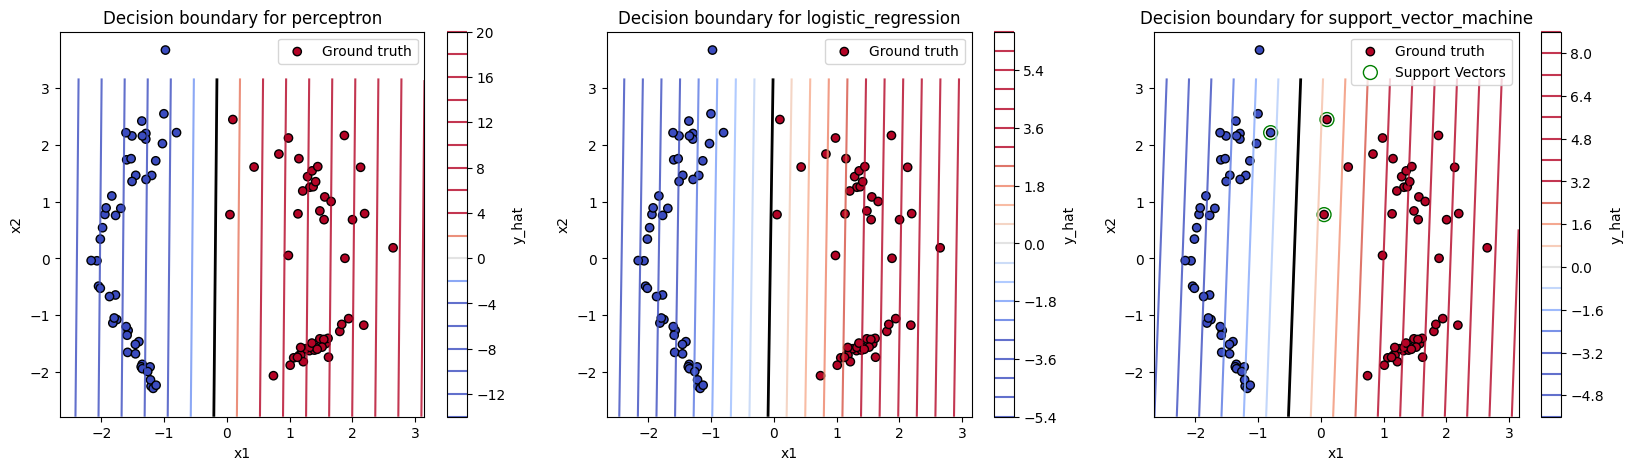

In [ ]:
# Generate synthetic data
X, y = skdata.make_classification(
    n_features=2,
    n_classes=2,
    n_redundant=0,
    n_clusters_per_class=2,
    n_samples=100,
    class_sep=1.5,
    random_state=1)

methods = [
    'perceptron',
    'logistic_regression',
    'support_vector_machine'
]

# DONE: Create figure with figsize=(20, 5)
fig = plt.figure(figsize=(20, 5))

# DONE: Enumerate through methods with index
for method in methods:

    # Instantiate model
    if method == 'perceptron':

        # DONE: Instantiate perceptron model with tolerance of 1e-1 and alpha of 0
        model = Perceptron(tol=1e-1, alpha=0)

    elif method == 'logistic_regression':

        # DONE: Instantiate logistic regression model with tolerance of 1e-1
        model = LogisticRegression(tol=1e-1)

    elif method == 'support_vector_machine':

        # DONE: Instantiate SVC (Support Vector Machine Classifier) with tolerance of 1e-1 and C=1e10 (simulates a hard-SVM) using a linear kernel
        model = SVC(tol=1e-1, C=1e10, kernel='linear')

    else:
        raise ValueError('Unsupported method: {}'.format(method))

    # DONE: Train the model
    model.fit(X, y)


    # TODO: Get x1_min and x1_max (0-th dimension), and x2_min and x2_max (1-st dimension) from X
    # Subtract 0.5 to give a little buffer in plots
    x1_min, x1_max = X[:, 0].min() - 0.5, X[:, 0].max() +0.5 
    x2_min, x2_max = X[:, 1].min() - 0.5, X[:, 1].max() + -.5

    # DONE: Create 2 linspaces: one from x1_min to x1_max and the other from x1_min to x2_max with 500 units
    x1_linspace = np.linspace(x1_min, x1_max, 500)
    x2_linspace = np.linspace(x2_min, x2_max, 500)

    # DONE: Create meshgrid for x1 and x2 using linspaces
    x1, x2 = np.meshgrid(x1_linspace, x2_linspace)

    # TODO: Predict values for every point in meshgrid
    # maybe c_stack?
    all_Xs = np.dstack([x1, x2]).reshape(-1, 2)
    y_hat = model.decision_function(all_Xs)


    # DONE: Reshape y_hat to x1 or x2's shape
    y_hat = y_hat.reshape(x1.shape)

    # DONE: Instantiate axis for subplot of a 1 x 3 figure
    ax = fig.add_subplot(1, 3, methods.index(method) + 1)

    # DONE: Plot Contour for predictions with levels=20, cmap='coolwarm', alpha=0.8, vmin=-3, vmax=3
    contour = ax.contour(x1, x2, y_hat, levels=20, cmap='coolwarm', alpha=0.8, vmin=-3, vmax=3)

    # DONE: Create colorbar for contour on axis and set its label to 'y_hat'
    cbar = plt.colorbar(contour, ax=ax)
    cbar.set_label('y_hat')


    # DONE: Plot decision boundary using levels=[0], colors='black', linewidths=2
    decision_boundary = ax.contour(x1, x2, y_hat, levels=[0], colors='black', linewidths=2)

    # DONE: Create scatter plot for X and set its color to y with edgecolor='black', cmap='coolwarm', label='Ground truth'
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='black', cmap='coolwarm', label='Ground truth')

    # DONE: If support vector machine
    # Create scatter plot of support vectors with s=100, facecolors='none', edgecolors='green', label='Support Vectors'
    if method == 'support_vector_machine':
        ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='green', label='Support Vectors')

    # DONE: Set title to ''Decision boundary for {}'
    ax.set_title('Decision boundary for {}'.format(method))


    # DONE: Set xlabel to 'x1'
    ax.set_xlabel('x1')

    # DONE: Set ylabel to 'x2'
    ax.set_ylabel('x2')

    # DONE: Set legend with loc='upper right'
    ax.legend(loc='upper right')

plt.show()

Load datasets

In [ ]:
# Load datasets
datasets = [
    skdata.load_iris(),
    skdata.load_breast_cancer(),
    skdata.load_digits(),
    skdata.load_wine()
]

dataset_names = [
    'Iris',
    'Breast cancer',
    'Digits',
    'Wine'
]

Compare Perceptron, Logistic Regression, and Support Vector Machines across all datasets

In [ ]:
# Define lists to hold validation scores across trials
scores_val = {
    'perceptron' : [],
    'logistic_regression': [],
    'support_vector_machine' : []
}

# Perform 10 trials of experiments
n_trial = 10

for n in range(n_trial):

    print('***** TRIAL {} *****\n'.format(n))

    # Zip up all dataset options
    dataset_options = zip(
        datasets,
        dataset_names)

    for dataset, dataset_name in dataset_options:

        '''
        Create the training and validation splits
        '''
        X = dataset.data
        y = dataset.target

        print('Preprocessing the {} dataset ({} samples, {} feature dimensions)'.format(dataset_name, X.shape[0], X.shape[1]))

        # Shuffle the dataset based on sample indices
        shuffled_indices = np.random.permutation(X.shape[0])

        # Choose the first 80% as training set and the next 20% as validation
        train_split_idx = int(0.80 * X.shape[0])

        train_indices = shuffled_indices[0:train_split_idx]
        val_indices = shuffled_indices[train_split_idx:]

        # Select the examples from X and y to construct our training and validation sets
        X_train, y_train = X[train_indices, :], y[train_indices]
        X_val, y_val = X[val_indices, :], y[val_indices]

        for method in ['perceptron', 'logistic_regression', 'support_vector_machine']:

            print('***** Experiments on the {} dataset using {} model *****'.format(
                dataset_name,
                method))

            # Instantiate model
            if method == 'perceptron':

                # TODO: Instantiate perceptron model with tolerance of 1e-1 and alpha of 0
                model = None

            elif method == 'logistic_regression':

                # TODO: Instantiate logistic regression model with tolerance of 1e-1
                model = None

            elif method == 'support_vector_machine':

                # TODO: Instantiate SVC (Support Vector Machine Classifier) with tolerance of 1e-1 and C=1 (soft SVM) using a linear kernel
                model = None

            else:
                raise ValueError('Unsupported method: {}'.format(method))


            # TODO: Train the model


            # TODO: Score model using mean accuracy on training set
            predictions_train = None
            score_train = None
            print('Training set mean accuracy: {:.4f}'.format(score_train))

            # TODO: Score model using mean accuracy validation set
            predictions_val = None
            score_val = None
            print('Validation set mean accuracy: {:.4f}'.format(score_val))

            # TODO: Append score to validation scores for the given method


        print('')

# TODO: Compute mean over trials for each method
mean_scores_val_perceptron = None
mean_scores_val_logistic = None
mean_scores_val_svm = None

print('***** Mean accuracy across {} trials *****'.format(n_trial))

print('Perceptron: {}'.format(mean_scores_val_perceptron))
print('Logistic Regression: {}'.format(mean_scores_val_logistic))
print('Support Vector Machine: {}'.format(mean_scores_val_svm))